In [10]:
import numpy as np
%load_ext autoreload
%autoreload 2
from audiolib import AudioDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
train = AudioDataset(path='../data/raw/nsynth-train/')

## FFT

### With audiolib/librosa

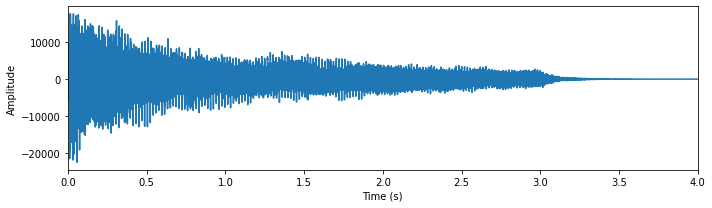

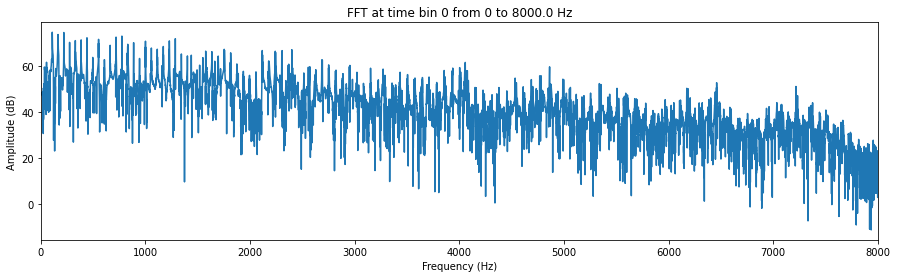

In [13]:
af = train.load_file(instrument='keyboard_acoustic', file_index=27)
af.audio.plot()
af.audio.play()
spec_alib = np.abs(af.audio.to_spectrogram())
spec_alib.plot_fft()

### With PyTorch

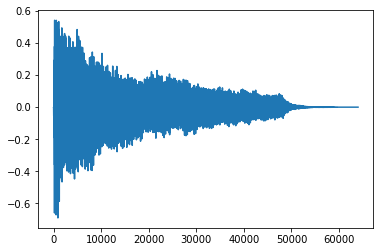

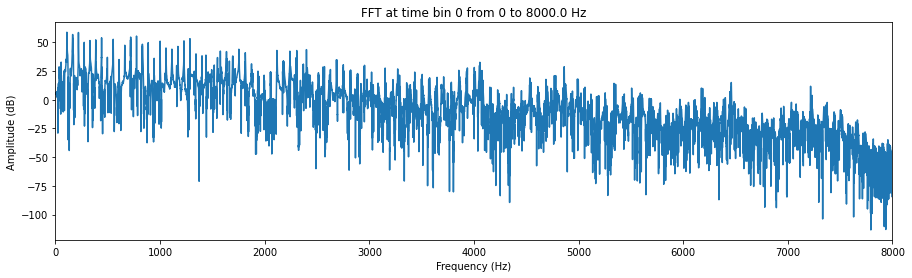

In [56]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from audiolib import Spectrogram

waveform, sample_rate = torchaudio.load(af.path)
plt.figure()
plt.plot(waveform.t().numpy())
spec_torch = torchaudio.transforms.Spectrogram(n_fft=64000)(waveform)

(Spectrogram(spec_torch[0, :, 0], sampling_rate=sample_rate)
 .reshape(-1, 1)
 .plot_fft())

### Comparison

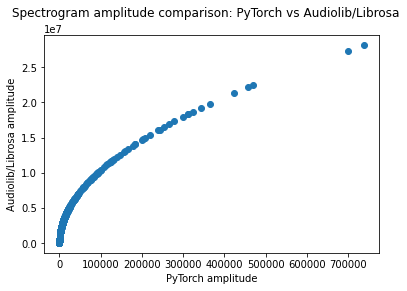

In [48]:
plt.scatter(x=spec_torch[0, :, 0], y=spec_alib[:, 0])
plt.suptitle('Spectrogram amplitude comparison: PyTorch vs Audiolib/Librosa');
plt.ylabel('Audiolib/Librosa amplitude')
plt.xlabel('PyTorch amplitude');

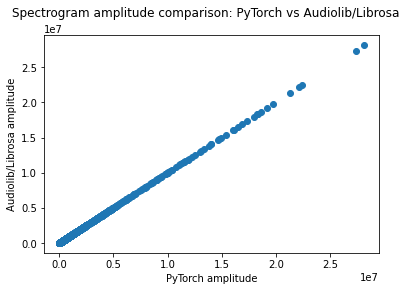

In [49]:
scale = spec_alib.max()/spec_torch.max()**0.5
plt.scatter(x=spec_torch[0, :, 0]**0.5*scale, y=spec_alib[:, 0])
plt.suptitle('Spectrogram amplitude comparison: PyTorch vs Audiolib/Librosa');
plt.ylabel('Audiolib/Librosa amplitude')
plt.xlabel('PyTorch amplitude');

As of now, PyTorch does not implement CQT. It might be worth looking at the newly released nnAudio: https://github.com/KinWaiCheuk/nnAudio